**Machine Learning Assignment**

Task 4:
 Spam SMS Detection - It is a process of identiying and filtering unwanted or unsolidated text messages(SMS) that are typically sent for advertising, phishing, fraud or other malicious purposes.

**Importing the libraries**:

**Pandas**-Used for loading and Manipulation of data

**NLTK**-Natural Language processinf tool kit used for performing steeming, lemmatization and Text Vectorization on the text data

**Scikit-Learn**-Used for extracting the Logistic Regression algorithm for classification of data

**Matplotlib**- Used for showing graphical representation of data

In [36]:
#Importing the necessary libraries for cleaning, ananlyzing, preprocessing and developing model with the help of logistic regression which can predict accurate output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

#Downloading stopwords in nltk library
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Load & Explore Data**- It is process of loading and exploring the dataset where we check data columns, rows, summary and null values

In [2]:
data=pd.read_csv('spam.csv',encoding='latin-1')
#Display the data
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#Inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#Summary of the Spam data
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


**Data Cleaning** - It is a process of identifying and correcting erros,inconsistencies, and inaccuracies in a dataset to improve its quality.

In [5]:
#Removing unnecessary columns from dataset
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
#Rename columns name with 'label' and 'Message'
data=data.rename(columns={'v1':'label','v2':'message'})
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
#Counting the number of spam and ham(non-spam) messages in sms data
data.label.value_counts()

,count
label,
0,4825
1,747


In [7]:
# Convert labels to binary
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data['label']

,label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


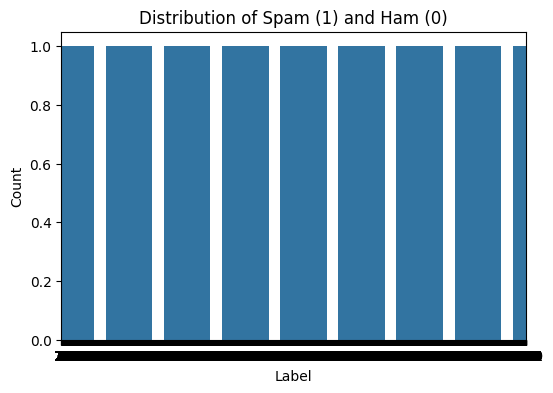

In [39]:
# Class distribution of Spam and ham messages
plt.figure(figsize=(6,4))
sns.countplot(data['label'])
plt.title('Distribution of Spam (1) and Ham (0)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [8]:
data.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
#Creating new colum  with 'length' for storing length of charcaters in message column
data['length']=data['message'].apply(len)
data.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**Data Pre-Processing** - It involves preparing a raw data and transform the data into a usable format

In [10]:
import re
import string
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = SnowballStemmer("english")
    tokens = [stemmer.stem(word) for word in tokens]
    # Rejoin
    return " ".join(tokens)

In [11]:
# Apply preprocessing function to the spam data for further evaluation
data['message'] = data['message'].apply(preprocess_text)
print(data['message'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkts st ...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    nd time tri contact u u å£ pound prize claim e...
5568                              ì b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object


**Train and Test Split** - The data is divided into X and Y varaibles where it will undergo in the process of Training and Testing the data

In [12]:
# Split Dataset
X = data['message']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

TF-IDF (**Term Frequency - Inverse Document frequency**) is a popular technique used in Natural Language processing (NLP) to convert text data into numerical features. It helps quantify the importance of a word in a document relative to a collection of documents(corpus).

In [22]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=2, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Model Building** - Developing a Model using Machine Learning Algorithm

Logistic Regression: It is a popular statistical and machine learning technique used for binary classification problems, where the output variable is categorical and has two possible outcomes (e.g.,Yes/No,Spam/Not Spam,0/1,etc.).

In [23]:
# Logistic Regression Model with class balancing and tuning
log_model = LogisticRegression(solver='liblinear', C=1.0, class_weight='balanced', max_iter=200)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=200, solver='liblinear')

**Model Evaluation**- It is the process of accessing how well a machine learning model performs on unseen or test data. In this process we check data accuracy_score, classification score, confusion matrix and precision

In [24]:
y_pred = log_model.predict(X_test_tfidf)

In [25]:
#Accuracy_score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9741564967695621


In [26]:
#Classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1206
           1       0.90      0.91      0.90       187

    accuracy                           0.97      1393
   macro avg       0.94      0.95      0.94      1393
weighted avg       0.97      0.97      0.97      1393



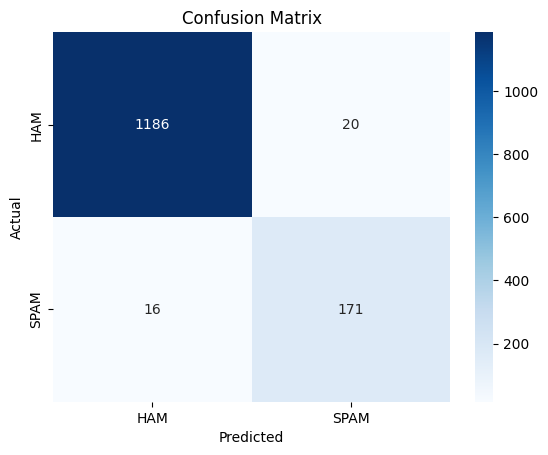

In [35]:
#Confusion Matrix
import matplotlib.pyplot as plt
y_pred = log_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['HAM', 'SPAM'], yticklabels=['HAM', 'SPAM'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**ROC Curve(Receiver Operating Characteristic Curve)**- It is a graphical representation used to evaluate the performance of a classification model. It plots two metrics:

-->True Positive or Recall

-->False Positive

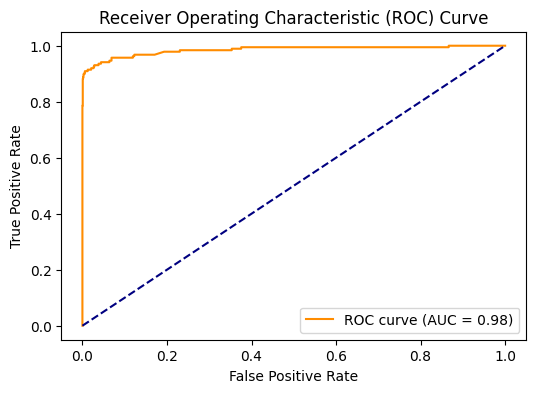

In [37]:
#ROC Curve
y_prob = log_model.predict_proba(X_test_tfidf)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Testing the Model with Example Messages**

Custom SMS Examples to test the model

In [53]:
custom_messages=[
    "Congratulations! You have been selected for a free cruise trip. Call now!",
    "Congrats! You won free flight tickets,just click this website.",
    "Win a brand new iPhone! Just reply to this message.",
    "Hey, I am running late but will join in 10 minutes.",
    "FREE entry into our competition! Text WIN to 12345 now!",
    "I will call you later!",
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!"
]

custom_tfdf=tfidf.transform(custom_messages)
predictions=log_model.predict(custom_tfdf)



In [54]:
#Display the predictions
print("\n--- Custom SMS Predictions ---\n")
for msg, pred in zip(custom_messages, predictions):
    print(f"Message: '{msg}' ➡️ Prediction: {'SPAM' if pred == 1 else 'NON-SPAM'}")


--- Custom SMS Predictions ---

Message: 'Congratulations! You have been selected for a free cruise trip. Call now!' ➡️ Prediction: SPAM
Message: 'Congrats! You won free flight tickets,just click this website.' ➡️ Prediction: SPAM
Message: 'Win a brand new iPhone! Just reply to this message.' ➡️ Prediction: SPAM
Message: 'Hey, I am running late but will join in 10 minutes.' ➡️ Prediction: NON-SPAM
Message: 'FREE entry into our competition! Text WIN to 12345 now!' ➡️ Prediction: SPAM
Message: 'I will call you later!' ➡️ Prediction: NON-SPAM
Message: 'Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!' ➡️ Prediction: SPAM


**Save the Model **

In [55]:
#Save the model using joblib
import pickle

# Save the trained model
with open('spam_classifier_logistic.pkl', 'wb') as model_file:
    pickle.dump(log_model, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!
